# Text vectorisation: Turning Text into Features 

## Part 2 — Word Embeddings and Word2Vec

> You shall know a word by the company it keeps (Firth, 1957).

`Word2vec` [Mikolov et al., 2013](https://arxiv.org/abs/1301.3781) and related techniques (e.g., [GloVe](https://nlp.stanford.edu/projects/glove/)) use the context of a given word — i.e., the words surrounding a word — to learn its meaning and represent it as vectors. In that sense, word embeddings and `Word2vec` in particualr are text vectorisation techniques.

We will use `gensim` to perform to  perform `Word2Vec`.

Two word2vec models exist: Skip-Gram and Continuous Bag of Words (CBOW)

The skip-gram model predicts the probabilities of a word given the context of word or words. For example, in the sentence "UK agrees Brexit trade deal", we have a target word and context words surrounding the target word. The number of words to be considered around the target word is called the window size. Using a window size of 2, here are the first three target and context variables for the sentence "UK agrees Brexit trade deal with EU": 

| Target word | Context word(s) |
|---|--------|
| UK | agree Brexit |
| agree | UK Brexit trade |
| Brexit | UK agree trade deal  |

See Akshay Kulkarni and Adarsha Shivananda. 2019. Natural Language Processing Recipes. [Chapter 3: Converting Text to Features](https://learning.oreilly.com/library/view/natural-language-processing/9781484242674/html/475440_1_En_3_Chapter.xhtml#)

In [88]:
# Imstall and import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#! pip install gensim
#import gensim
from gensim.models import Word2Vec
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.summarization.textcleaner import split_sentences

from sklearn.decomposition import PCA

import re
import os

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#### Text corpus

In [89]:
# Load the parsed news dataset 
corpus = pd.read_csv('sample_news_large_phrased.csv', index_col='index')

In [90]:
corpus.head(2)

query  \
index              
0      Hong Kong   
1      Hong Kong   

                                                                                                                  title  \
index                                                                                                                     
0                                                                                   Horrifying view of fires from space   
1      Protester shot with live round in Hong Kong as chaos breaks out during Monday commute | South China Morning Post   

                                                                                                                                                                                                          text  \
index                                                                                                                                                                                                            
0      Video Image Satellite images show insane view of NSW fires from space Satellite images show the huge amount of smoke billowing from a number of bushfires across NSW.\nThe NSW fires, as seen from s...   
1      \n Chief Executive addresses the press after citywide chaos and transport disruptions \n Earlier, police shoot protester leaving him in intensive care, while separately, a man is set on fire durin...   

                           published         site  \
index                                               
0      2019-11-08T23:51:00.000+02:00  news.com.au   
1      2019-11-11T02:00:00.000+02:00     scmp.com   

                                                                                                                                                                                                        tokens  
index                                                                                                                                                                                                           
0      video|*|image|*|satellite|*|image|*|insane|*|view|*|nsw|*|fire|*|space|*|satellite|*|image|*|huge|*|smoke|*|billow|*|number|*|bushfire|*|nsw|*|nsw|*|fire|*|space|*|source|*|twitter|*|startling|*|s...  
1      chief_executive|*|address|*|press|*|citywide|*|chaos|*|transport|*|disruption|*|early|*|police|*|shoot|*|protester|*|leave|*|-pron-|*|intensive|*|care|*|separately|*|man|*|set|*|fire|*|dispute|*|c...

In [91]:
# Subset news stories about brexit
corpus_brexit = corpus[corpus['query']=='brexit']

corpus_toy=corpus_brexit.iloc[[7,22], [1]]

# Set the maximum width of columns
pd.options.display.max_colwidth = 200

corpus_toy.head(5)

title
index                                                                                                                    
132    Brexit news: Gina Miller unveils new Remainer plot to block Brexit in general election | UK | News | Express.co.uk
147           Brexit news: Labour pledge to continue ‘freedom of movement’ infuriates Leavers | UK | News | Express.co.uk

In [92]:
# Convert your tokens in the News dataset into a list
corpus_brexit['tokens']= corpus_brexit['tokens'].apply(lambda token_string: token_string.split('|*|'))

<ipython-input-92-148acfbc1404>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus_brexit['tokens']= corpus_brexit['tokens'].apply(lambda token_string: token_string.split('|*|'))


In [93]:
corpus['tokens']= corpus['tokens'].apply(lambda token_string: token_string.split('|*|'))

In [94]:
corpus['tokens'].head()

index
0    [video, image, satellite, image, insane, view, nsw, fire, space, satellite, image, huge, smoke, billow, number, bushfire, nsw, nsw, fire, space, source, twitter, startling, satellite, image, fire,...
1    [chief_executive, address, press, citywide, chaos, transport, disruption, early, police, shoot, protester, leave, -pron-, intensive, care, separately, man, set, fire, dispute, chaos, continue, sho...
2    [hong_kong, cnn, china, announce, curfew, online, gaming, minor, new, measure, aim, curb, video, game, addiction, official, government, guideline, apply, online, gaming, platform, operate, country...
3    [washington, cnn, president_donald, trump, relentlessly, dishonest, week, scandal, -pron-, dealing, ukraine, false_claim, component, story, trump, false_claim, week, second, high, total, week, -pr...
4    [cnn, bread, -pron-, likely, think, long, -pron-, hungry, slice, sourdough, crave, tortilla, -pron-, imagine, lot, -pron-, bread, easy, picture, -pron-, hard, define, br

In [95]:
# Training the word2vec skip-gram model
skipgram = Word2Vec(corpus_brexit['tokens'], size =300, window = 3, min_count=1,sg = 1)


In [96]:
skipgram['brexit']

array([ 1.10339671e-02,  5.35314232e-02, -4.76296172e-02, -2.37357765e-02,
        7.82220289e-02, -6.49256855e-02, -4.30400483e-02,  9.73543711e-03,
       -4.27045971e-02, -3.15042660e-02, -5.13362885e-03, -1.03586115e-01,
       -5.83391562e-02,  8.03637803e-02, -5.61293922e-02, -5.10361493e-02,
       -1.38064399e-02, -4.99294363e-02, -8.40386972e-02, -1.01373801e-02,
       -4.01349775e-02, -6.30826727e-02,  7.00792745e-02,  1.63532775e-02,
       -4.27237079e-02, -5.09361140e-02, -3.44197638e-02, -1.09509863e-02,
       -1.08570838e-02,  1.05462922e-02, -3.29462700e-02, -1.81678403e-02,
       -3.11545860e-02, -6.18884116e-02, -8.63861144e-02,  3.79243307e-02,
       -5.10606281e-02, -1.93262212e-02,  7.27659045e-03,  5.87044656e-02,
       -1.14860553e-02,  4.58487645e-02, -3.54233198e-02,  8.23120177e-02,
        1.35070761e-03,  2.23866832e-02,  4.63589095e-02, -4.94884364e-02,
       -3.71846184e-02,  2.60066558e-02,  2.67280024e-02, -5.34508936e-03,
        2.42387149e-02, -

In [36]:
print("Dimensionality—size of vocabulary and size of vectors:", skipgram)

# access vector for one word, "brexit" in this instance
print("vector for 'brexit':", skipgram['brexit'])

Dimensionality—size of vocabulary and size of vectors: Word2Vec(vocab=2674, size=300, alpha=0.025)
vector for 'brexit': [ 1.10339671e-02  5.35314232e-02 -4.76296172e-02 -2.37357765e-02
  7.82220289e-02 -6.49256855e-02 -4.30400483e-02  9.73543711e-03
 -4.27045971e-02 -3.15042660e-02 -5.13362885e-03 -1.03586115e-01
 -5.83391562e-02  8.03637803e-02 -5.61293922e-02 -5.10361493e-02
 -1.38064399e-02 -4.99294363e-02 -8.40386972e-02 -1.01373801e-02
 -4.01349775e-02 -6.30826727e-02  7.00792745e-02  1.63532775e-02
 -4.27237079e-02 -5.09361140e-02 -3.44197638e-02 -1.09509863e-02
 -1.08570838e-02  1.05462922e-02 -3.29462700e-02 -1.81678403e-02
 -3.11545860e-02 -6.18884116e-02 -8.63861144e-02  3.79243307e-02
 -5.10606281e-02 -1.93262212e-02  7.27659045e-03  5.87044656e-02
 -1.14860553e-02  4.58487645e-02 -3.54233198e-02  8.23120177e-02
  1.35070761e-03  2.23866832e-02  4.63589095e-02 -4.94884364e-02
 -3.71846184e-02  2.60066558e-02  2.67280024e-02 -5.34508936e-03
  2.42387149e-02 -8.71204585e-03 -5

<ipython-input-36-2527db47bd23>:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print("vector for 'brexit':", skipgram['brexit'])


In [37]:
# Similarity between two tokens, e.g., brexit and deal
skipgram.wv.similarity('brexit', 'deal')

0.99941033

In [38]:
# The most similar token to a given token, e.g., brexit
skipgram.wv.most_similar(positive = "brexit")

[('-pron-', 0.9996731877326965),
 ('uk', 0.9995173811912537),
 ('labour', 0.9994999170303345),
 ('eu', 0.9994867444038391),
 ('party', 0.9994455575942993),
 ('parliament', 0.9994397163391113),
 ('remain', 0.9994328022003174),
 ('government', 0.9994179010391235),
 ('leave', 0.9994163513183594),
 ('people', 0.9994127154350281)]

<ipython-input-39-d1d78608db6a>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  data = skipgram[skipgram.wv.vocab]


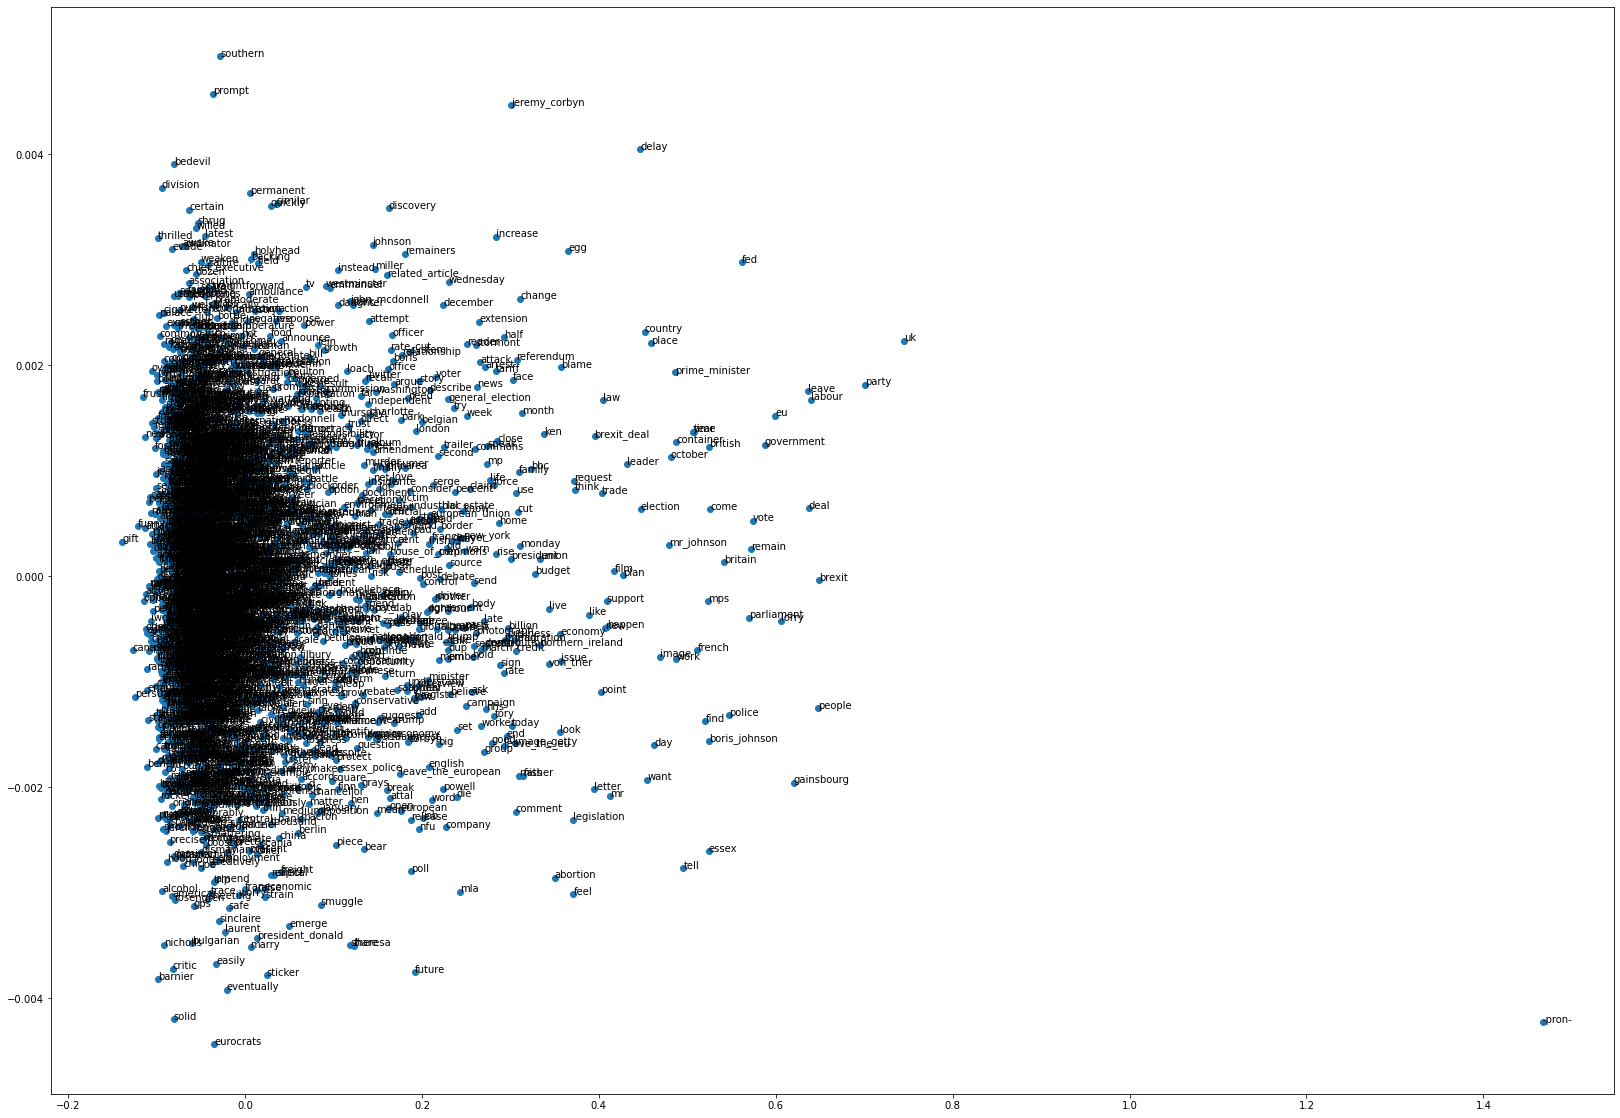

In [39]:
# Fit Principal component analysis (PCA) on the skipgram model output and plot the first 2 components

data = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(data)
# create a scatter plot of the projection
plt.figure(figsize=(28,20))
plt.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)

for i, word in enumerate(words):
       plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


#### Use a pre-trained model using Google News data

See the article by Garg etal. 2018 [Word embeddings quantify 100 years of gender and ethnic stereotypes](https://www.pnas.org/content/115/16/E3635) 

In [40]:
# Load the Word2vec model trained on the Google News dataset 
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

#### Use the pretrained models to identify possible biases and stereotypes

In [41]:
# Obtain vectors for terms in the model
immigration = wv['immigration']
immigration

array([-1.16210938e-01,  1.35742188e-01,  1.36718750e-01,  1.42578125e-01,
       -2.55859375e-01, -2.87109375e-01,  1.05468750e-01,  2.40234375e-01,
       -2.51953125e-01, -6.29882812e-02,  2.91015625e-01, -3.34472656e-02,
       -2.78320312e-02,  1.82617188e-01,  4.41894531e-02, -1.02539062e-01,
        1.40625000e-01,  6.25000000e-01, -1.04492188e-01, -2.40234375e-01,
        7.51953125e-02, -3.90625000e-02,  3.35937500e-01, -1.33789062e-01,
       -6.05468750e-02, -5.07812500e-02,  1.24511719e-01, -2.29492188e-01,
        1.78710938e-01,  7.23266602e-03,  1.53320312e-01, -4.29687500e-02,
       -5.90820312e-02, -1.51367188e-01,  1.36718750e-02, -6.68945312e-02,
       -1.87988281e-02,  1.26953125e-01,  8.69140625e-02, -5.07812500e-02,
       -2.05078125e-01, -1.35742188e-01,  2.59765625e-01,  1.42578125e-01,
       -2.71484375e-01,  9.71679688e-02, -1.24511719e-01,  2.55859375e-01,
        8.00781250e-02,  3.90625000e-02,  8.44726562e-02, -1.29882812e-01,
       -1.42578125e-01,  

In [42]:
print(wv.most_similar(positive=['immigration'], topn=20))

[('Immigration', 0.7575444579124451), ('illegal_immigration', 0.7396935224533081), ('immigrations', 0.7351098656654358), ('illegal_immigrants', 0.661632776260376), ('immigation', 0.6604097485542297), ('immigrants', 0.6578113436698914), ('illegal_immigrant', 0.6361725330352783), ('immigration_reform', 0.6335227489471436), ('illegal_alien', 0.6089527010917664), ('deportations', 0.6071246862411499), ('deportation', 0.6051470041275024), ('immigrant', 0.6017557382583618), ('undocumented_immigrants', 0.5970046520233154), ('IMMIGRATION', 0.5869342088699341), ('undocumented_workers', 0.5762966275215149), ('immi_gration', 0.5624114274978638), ('deporting', 0.5618883967399597), ('illegal_aliens', 0.55970698595047), ('attorney_Ilana_Greenstein', 0.5589761734008789), ('deport', 0.5580031275749207)]


In [43]:
# print the 5 most similar words to “nurse” or “librarian”
print(wv.most_similar(positive=['nurse', 'librarian'], topn=20))

[('registered_nurse', 0.7211818695068359), ('reference_librarian', 0.634443461894989), ('nurse_practitioner', 0.6301048994064331), ('teacher', 0.6299265623092651), ('guidance_counselor', 0.6149507761001587), ('respiratory_therapist', 0.6086797118186951), ('midwife', 0.5967817902565002), ('schoolteacher', 0.5860755443572998), ('dental_hygienist', 0.5835506916046143), ('neonatal_nurse', 0.5728733539581299), ('medical_transcriptionist', 0.5722984075546265), ('x_ray_technician', 0.5703535079956055), ('radiology_technician', 0.567882776260376), ('nurses', 0.5677641034126282), ('para_educator', 0.5656979084014893), ('nurse_midwife', 0.559863269329071), ('Librarian', 0.5595521330833435), ('candy_striper', 0.5586028099060059), ('receptionist', 0.5556811690330505), ('Licensed_Practical_Nurse', 0.5554629564285278)]


In [18]:
# Compare similarities of pairs of concepts
pairs = [
    ('sociology', 'society'), 
    ('sociology', 'individual'),
    ('sociology', 'market'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'sociology'	'society'	0.26
'sociology'	'individual'	0.01
'sociology'	'market'	-0.01


#### Popular analogy tasks

In [19]:
# Vector relations and word analogies e.g. vector_King - vector_Man = vector_Queen - vector_Woman
wv.most_similar(positive=['king', 'women'], negative=['man'])

[('queen', 0.4827325940132141),
 ('queens', 0.4667813777923584),
 ('kumaris', 0.4653733968734741),
 ('kings', 0.4558638334274292),
 ('womens', 0.422832190990448),
 ('princes', 0.4176960587501526),
 ('Al_Anqari', 0.4172550439834595),
 ('concubines', 0.4011078476905823),
 ('monarch', 0.39624831080436707),
 ('monarchy', 0.39430153369903564)]

In [20]:
# Another analogy example
wv.most_similar(positive=['Rome', 'France'], negative=['Paris'])

[('Italy', 0.7143559455871582),
 ('Italians', 0.5599662661552429),
 ('Sicily', 0.5547021627426147),
 ('Flaminio_Stadium', 0.5299074649810791),
 ('Spain', 0.5046595335006714),
 ('Bambino_Gesu_Hospital', 0.4948221445083618),
 ('Italian', 0.49266600608825684),
 ('Portugal', 0.48604875802993774),
 ('Val_Di_Fiemme', 0.48168694972991943),
 ('Antonio_Martino', 0.48000505566596985)]

### Doc2vec paragraph embeddings using Gensim

In [100]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus_brexit['tokens'])]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)
model

### Different ways of storing and accessing your corpus for Word2Vec training

In [21]:
# Save in a variable the path to your directory where you store your text files 
DocByLine = '/Users/valentindanchev/Documents/Teaching/sc207/DocByLine'

If you have a plain-text file or files where each 'document' is on its own line, you can use the class [`MyPreprocessedSentences`](https://rare-technologies.com/word2vec-tutorial/) to process the input file by file, line by line. The class collects documents and processes them using the function `simple_preprocess` from the module `gensim.utils`, which contains various general utility functions. The function converts a document into a list of tokens that are lowercased and de-accented (optional). We use txt files from the Gutenberg project, including the books [Pride and Prejudice](http://www.gutenberg.org/ebooks/1342), [Frankenstein](http://www.gutenberg.org/ebooks/84), and others. 

Parameters of `simple_preprocess`: 

* `doc` This is your input document (str).

* `min_len` Minimum lenght of token in output (inclusive). Shorter tokens are discarded. Default is 2. 

* `max_len` Maximum length of token in output (inclusive). Longer tokens are discarded. Default is 15. 

* `deacc` Remove accent marks from tokens using the deaccent() function. Default is `False`.

Let's add `simple_preprocess` to the `MySentences` class:

In [22]:
# Define the class MyPreprocessedSentences
class MyPreprocessedSentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            # specify encoding "cp437" as other encodings, e.g., "utf8" may give you an error
            for line in open(os.path.join(self.dirname, fname), encoding="cp437"):
                yield gensim.utils.simple_preprocess(line, deacc=True) # vocabulary preprocessing 

In [23]:
# Apply MyPreprocessedSentences and fit the vanilla Word2Vec model to the preprocessed sentences
sentences = MyPreprocessedSentences(DocByLine) # a memory-friendly iterator
model = gensim.models.Word2Vec(sentences, min_count=1)

You can view the model vocabulary in the field `vocab` of the Word2Vec model's `wv` property. The vocabulary is stored as a dictionary where each key is a token. 

In [24]:
# Show the vocabulary of your Word2Vec model
model.wv.vocab

{'it': <gensim.models.keyedvectors.Vocab at 0x7feae3cb2bb0>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7feae3cb2ca0>,
 'truth': <gensim.models.keyedvectors.Vocab at 0x7feae3caf1f0>,
 'universally': <gensim.models.keyedvectors.Vocab at 0x7feae3caf3d0>,
 'acknowledged': <gensim.models.keyedvectors.Vocab at 0x7feae3caf430>,
 'that': <gensim.models.keyedvectors.Vocab at 0x7feae3caf490>,
 'single': <gensim.models.keyedvectors.Vocab at 0x7feae3caf520>,
 'man': <gensim.models.keyedvectors.Vocab at 0x7feae3caf580>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7feae3caf5e0>,
 'possession': <gensim.models.keyedvectors.Vocab at 0x7feae3caf280>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7feae3caf670>,
 'good': <gensim.models.keyedvectors.Vocab at 0x7feae3caf3a0>,
 'fortune': <gensim.models.keyedvectors.Vocab at 0x7feae3caf700>,
 'must': <gensim.models.keyedvectors.Vocab at 0x7feae3caf760>,
 'be': <gensim.models.keyedvectors.Vocab at 0x7feae3caf790>,
 'want': <gensim.models.keyedvectors.Vo

In [25]:
# Show the size of the vocabulary
len(model.wv.vocab)
# Change the min_len parameter of the simple_preprocess function in the MyPreprocessedSentences class 
# and check again the length of the vocabulary

115

Sometimes our docuemtns are not neatly organised such that each line in a file is a 'document'. For example, we may have many books each stored as a single file in a directory.

In [26]:
DocByFile = '/Users/valentindanchev/Documents/Teaching/sc207/DocByFile'
DocByFile

'/Users/valentindanchev/Documents/Teaching/sc207/DocByFile'

In [27]:
class FromBooksToSentences(object):
    def __init__(self, dirname):
        self.dirname = dirname

    def __iter__(self):
        for fname in os.listdir(self.dirname):
            #with open(os.path.join(self.dirname, fname), encoding="cp437") as f:
            with open(os.path.join(self.dirname, fname), errors='ignore') as f:
                # Read each file and replace multiple characters at once using nested replace()
                text = f.read().replace('\n', '').replace('”', '').replace('“', '')
                #print(text)
                # Use the re module to replace all multiple whitespaces with single whitespace 
                text = re.sub('\s+',' ', text)
                #print(text)
                # print(text) # uncomment to see the output
                # Split the text into a list of sentences using the split_sentences function from gensim   
                for sentence in split_sentences(text):
                    print("SENTENCE:",sentence) # uncomment to see the output
                    yield gensim.utils.simple_preprocess(sentence, deacc=True)

In [28]:
sentences = FromBooksToSentences(DocByFile)
model = gensim.models.Word2Vec(sentences, min_count=2)

SENTENCE: Pride and Prejudice By Jane Austen Chapter 1 It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.
SENTENCE: However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters.
SENTENCE: My dear Mr. Bennet, said his lady to him one day, have you heard that Netherfield Park is let at last?
SENTENCE: Mr. Bennet replied that he had not.
SENTENCE: But it is, returned she; for Mrs. Long has just been here, and she told me all about it.
SENTENCE: Mr. Bennet made no answer.
SENTENCE: Do you not want to know who has taken it?
SENTENCE: cried his wife impatiently.
SENTENCE: _You_ want to tell me, and I have no objection to hearing it.
SENTENCE: This was invitation enough.
SENTENCE: Why, my dear, you must know, Mrs. Long says that Nethe

In [29]:
model.wv.vocab

{'pride': <gensim.models.keyedvectors.Vocab at 0x7feae3cb4f10>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7feaa01125b0>,
 'prejudice': <gensim.models.keyedvectors.Vocab at 0x7feae0f2fca0>,
 'by': <gensim.models.keyedvectors.Vocab at 0x7feae0f2f4c0>,
 'jane': <gensim.models.keyedvectors.Vocab at 0x7feae0f2f310>,
 'chapter': <gensim.models.keyedvectors.Vocab at 0x7feae3cbe310>,
 'it': <gensim.models.keyedvectors.Vocab at 0x7feae3cbed90>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7feae3cbe280>,
 'truth': <gensim.models.keyedvectors.Vocab at 0x7feae3cbe7f0>,
 'universally': <gensim.models.keyedvectors.Vocab at 0x7feae3cbe160>,
 'acknowledged': <gensim.models.keyedvectors.Vocab at 0x7feae3cbec70>,
 'that': <gensim.models.keyedvectors.Vocab at 0x7feae3cbe8b0>,
 'single': <gensim.models.keyedvectors.Vocab at 0x7feae3cbec10>,
 'man': <gensim.models.keyedvectors.Vocab at 0x7feae3cbea90>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7feae3cbe250>,
 'possession': <gensim.models.keyedvec

In [30]:
len(model.wv.vocab)

6170

In [31]:
model.wv['frankenstein']

array([ 0.00596439, -0.02721652, -0.0728479 , -0.11235453, -0.05825142,
       -0.01667918, -0.11683006,  0.12143344,  0.05505014,  0.0090804 ,
       -0.18184881, -0.17362101,  0.01006464,  0.01047337,  0.02789926,
        0.04896723,  0.09763103,  0.15846376,  0.17084555, -0.18366483,
       -0.10608718,  0.10064472,  0.09372999, -0.03506898, -0.084833  ,
        0.19277087,  0.02366534, -0.07353307,  0.01486934,  0.10887588,
       -0.17061917, -0.03124821,  0.07556986,  0.10076655,  0.05451987,
        0.02505218, -0.18265301,  0.06541444,  0.10702297,  0.03484735,
        0.16547415,  0.10305822,  0.07913024, -0.04037144,  0.05950821,
       -0.00110713,  0.17410362, -0.15616685,  0.10235649, -0.10269988,
       -0.24157727, -0.1251259 ,  0.02388742, -0.17155567,  0.24046977,
        0.18024276, -0.02234548,  0.0010663 ,  0.0279376 ,  0.0666868 ,
        0.02319191, -0.00774079,  0.10281772,  0.07047536, -0.03902516,
       -0.01022032, -0.05978408, -0.02003867, -0.18913685,  0.27

In [32]:
print(model.wv.most_similar(positive=['frankenstein'], topn=10))

[('sir', 0.9993871450424194), ('quite', 0.9993196725845337), ('often', 0.9991620779037476), ('now', 0.9991222023963928), ('answer', 0.999091386795044), ('deal', 0.999076783657074), ('here', 0.9990695714950562), ('convinced', 0.9990653991699219), ('oh', 0.9990415573120117), ('thus', 0.9990404844284058)]


## Acknowledgements

1. [Converting Text to Features,](https://learning.oreilly.com/library/view/natural-language-processing/9781484242674/html/475440_1_En_3_Chapter.xhtml#) in _Natural Language Processing Recipes_. Akshay Kulkarni & Adarsha Shivananda. 2019.
2. [Sklearn's module on feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html).
3. [Vector Semantics and Embeddings,](https://web.stanford.edu/~jurafsky/slp3/6.pdf) in _Speech and Language Processing_. Daniel Jurafsky & James H. Martin. Draft of December 30, 2020.
4. [K-Means Clustering with scikit-learn.](http://jonathansoma.com/lede/algorithms-2017/classes/clustering/k-means-clustering-with-scikit-learn/)
5. [Pandas for Everyone.](https://www.pearson.com/us/higher-education/program/Chen-Pandas-for-Everyone-Python-Data-Analysis/PGM335102.html). Daniel Chen. 2018. 